**Define Cutom Perceptron**

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class CustomPerceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0  # Step function

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)

                # Update weights and bias if prediction is wrong
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

**Data Train**

In [14]:

# Data (AND gate)
X = np.array([[1, 1], [0, 0], [0, 1], [1, 0]])
y = np.array([1, 0, 0, 0])

# Train custom perceptron
perceptron = CustomPerceptron(learning_rate=0.1, epochs=100)
perceptron.fit(X, y)

print("Weights (coefficients):", perceptron.weights)
print("Bias (intercept):", perceptron.bias)

Weights (coefficients): [0.2 0.1]
Bias (intercept): -0.20000000000000004


**Plotting In Graph**

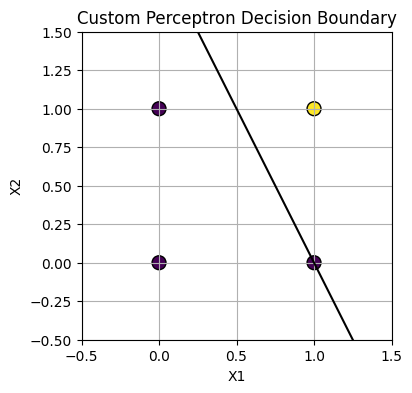

In [15]:
# Plotting
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k')

# Decision boundary line
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
if perceptron.weights[1] != 0:  # Avoid division by zero
    xx = np.linspace(x_min, x_max, 100)
    yy = (-perceptron.weights[0] / perceptron.weights[1]) * xx - (perceptron.bias / perceptron.weights[1])
    plt.plot(xx, yy, 'k-')
else:
    plt.axvline(x=-perceptron.bias/perceptron.weights[0], color='k')

plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Custom Perceptron Decision Boundary")
plt.grid(True)
plt.show()